In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


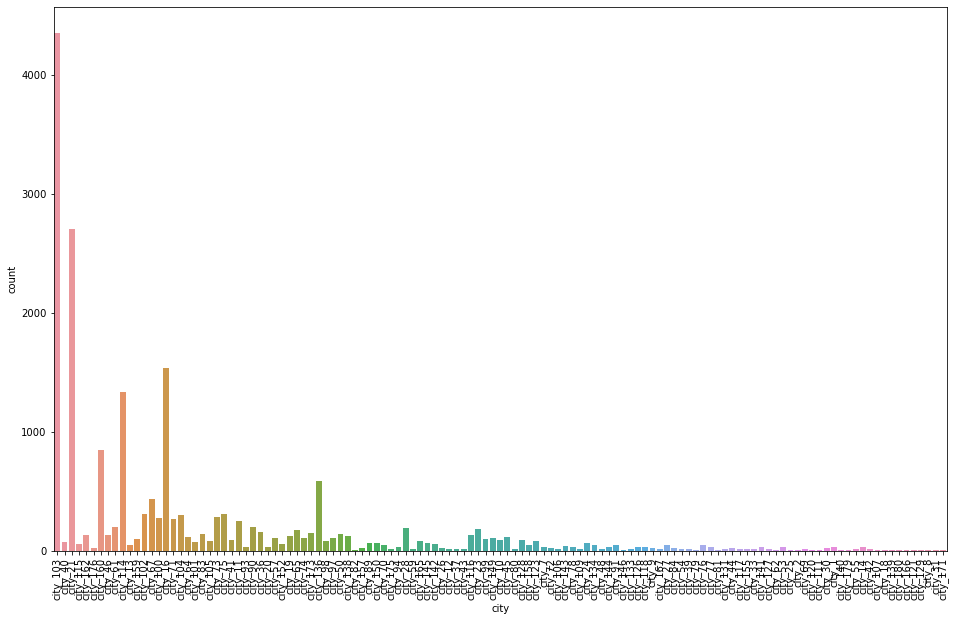

In [5]:
plt.figure(figsize = (16,10))
sns.countplot(df['city'])
plt.xticks(rotation = 90)
plt.show()

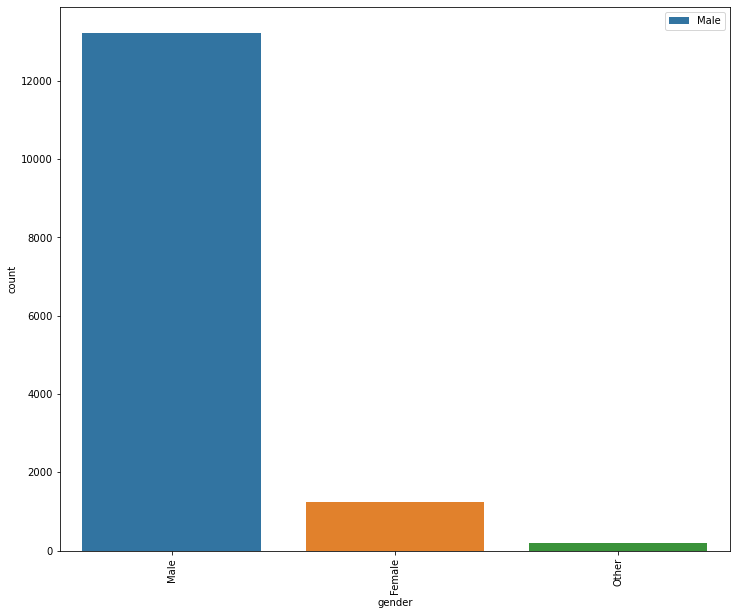

In [6]:
plt.figure(figsize = (12,10))
sns.countplot(df['gender'])
plt.xticks(rotation = 90)
plt.legend(df['gender'])
plt.show()

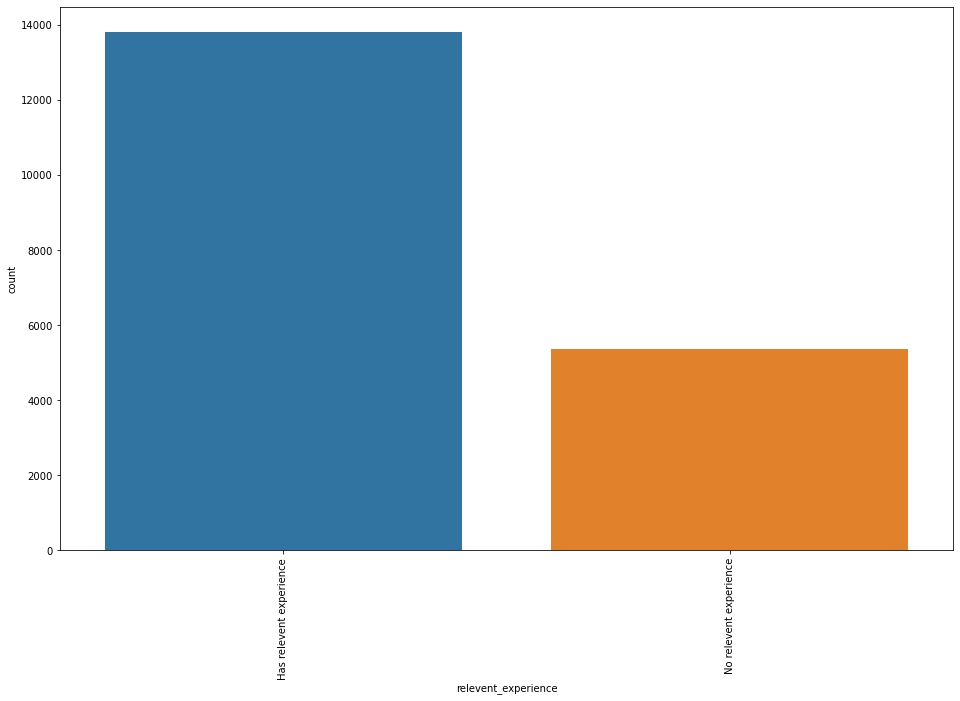

In [7]:
plt.figure(figsize = (16,10))
sns.countplot(df['relevent_experience'],)
plt.xticks(rotation = 90)
plt.show()

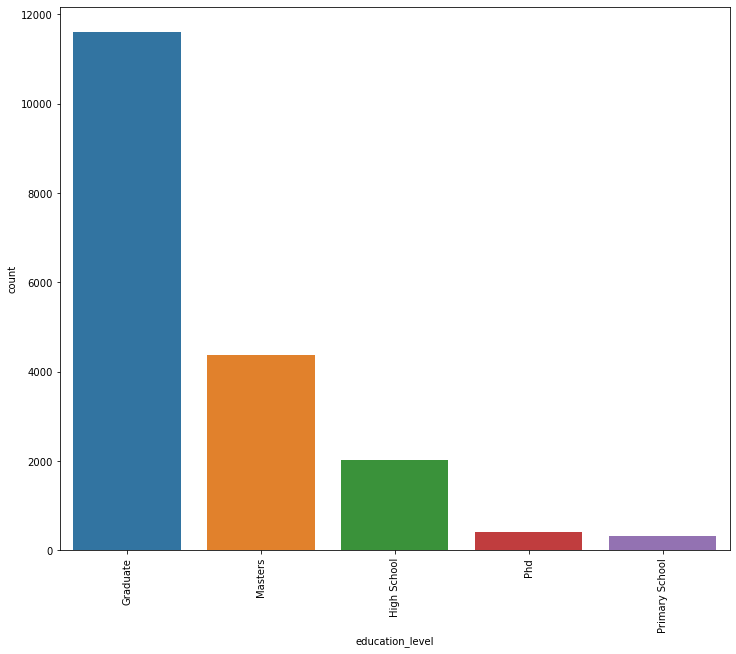

In [8]:
plt.figure(figsize = (12,10))
sns.countplot(df['education_level'])
plt.xticks(rotation = 90)
plt.show()

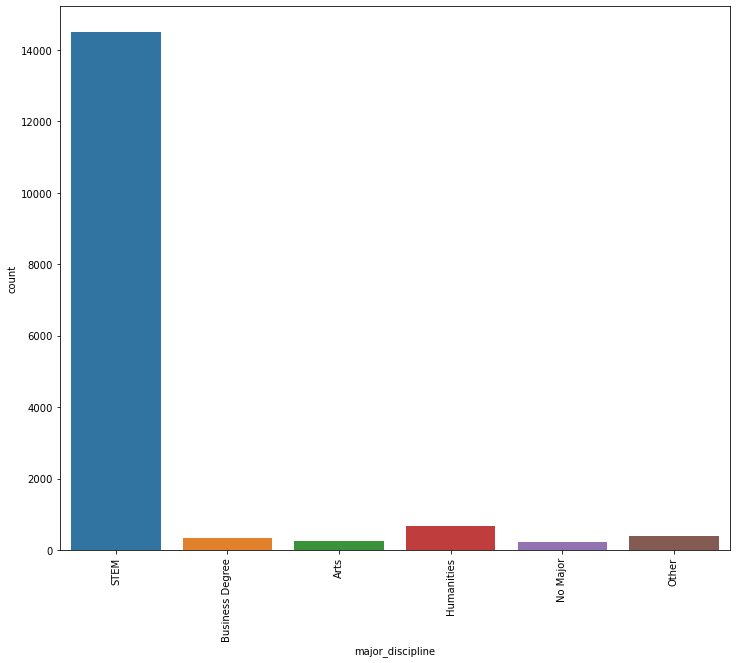

In [9]:
plt.figure(figsize = (12,10))
sns.countplot(df['major_discipline'])
plt.xticks(rotation = 90)
plt.show()

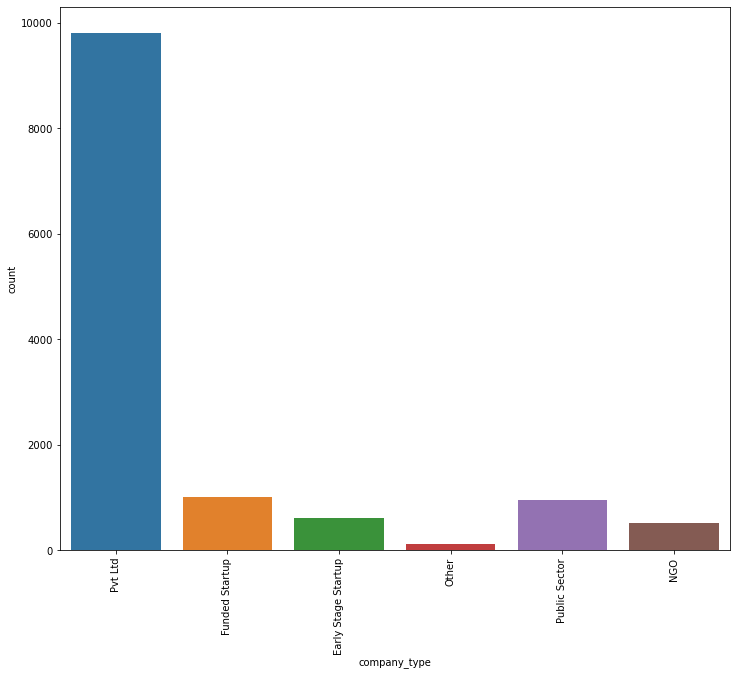

In [10]:
plt.figure(figsize = (12,10))
sns.countplot(df['company_type'])
plt.xticks(rotation = 90)
plt.show()

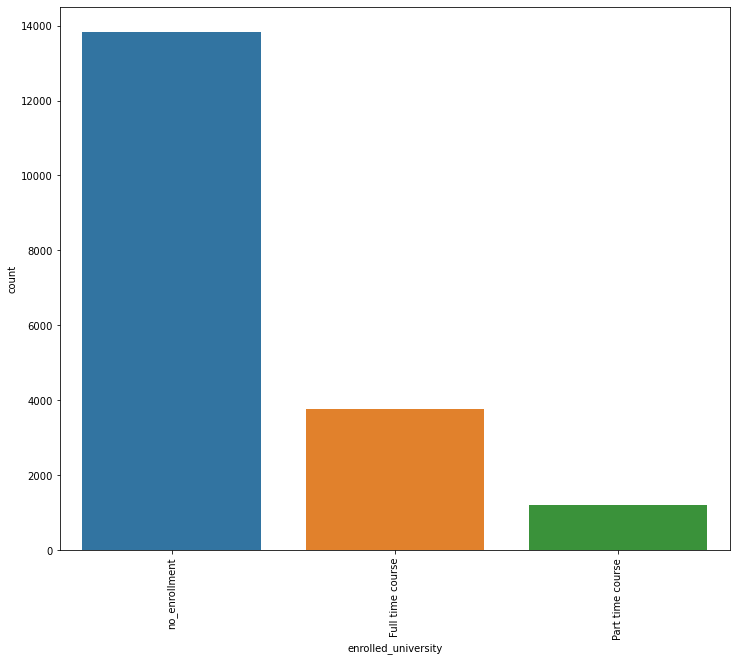

In [11]:
plt.figure(figsize = (12,10))
sns.countplot(df['enrolled_university'])
plt.xticks(rotation = 90)
plt.show()

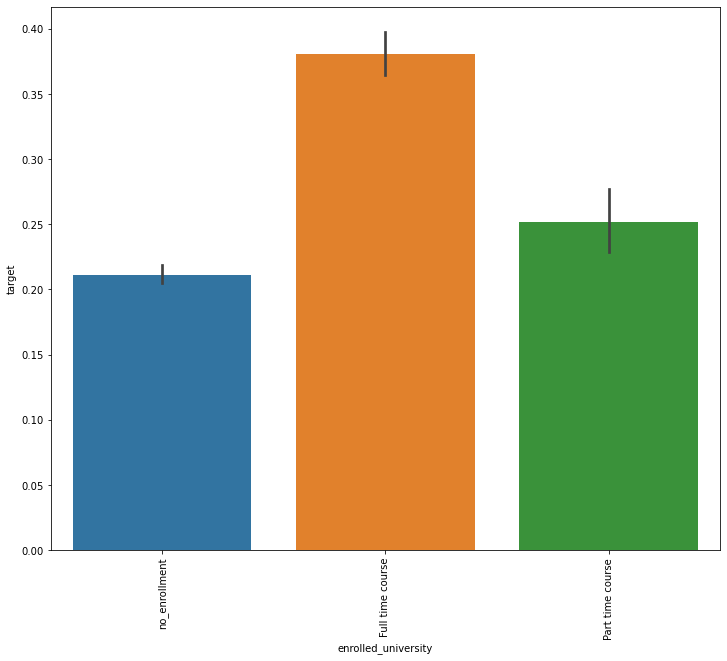

In [12]:
plt.figure(figsize = (12,10))
sns.barplot(df['enrolled_university'] , df['target'])
plt.xticks(rotation = 90)
plt.show()

## Data Wrangling

In [13]:
# Checking for missing values

df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='most_frequent')
miss_list = ['gender','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']
df[miss_list] = si.fit_transform(df[miss_list])

In [15]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [16]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [17]:
cat_labels = df.select_dtypes(include='object').columns
cat_labels

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[cat_labels] = df[cat_labels].apply(le.fit_transform)

In [19]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,1,0,2,0,5,21,4,5,0,36,1.0
1,29725,77,0.776,1,1,2,0,5,6,4,5,4,47,0.0
2,11561,64,0.624,1,1,0,0,5,15,4,5,5,83,0.0
3,33241,14,0.789,1,1,2,0,1,20,4,5,5,52,1.0
4,666,50,0.767,1,0,2,2,5,21,4,1,3,8,0.0


In [20]:
# Dropping unnecessary columns
df.drop(['city','enrollee_id'] , 1,inplace=True)

In [21]:
X = df.drop('target',1)
y = df['target']

In [22]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_Smote,y_Smote = smote.fit_resample(X,y)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train ,y_test = train_test_split(X_Smote,y_Smote,train_size = 0.7 ,random_state = 102 )

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.9982118909253465

In [26]:
rf.score(X_test,y_test)

0.802874029435624

In [27]:
y_pred = rf.predict(X_test)

In [28]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[3404,  937],
       [ 764, 3524]], dtype=int64)

In [29]:
# Using AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
ada.score(X_train,y_train)

0.734714150896538

In [30]:
ada.score(X_test,y_test)

0.7441186696025032

In [31]:
# Using CatBoostClassifier 
import catboost
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
cb.fit(X_train,y_train)

Learning rate set to 0.037128
0:	learn: 0.6843698	total: 191ms	remaining: 3m 11s
1:	learn: 0.6752714	total: 205ms	remaining: 1m 42s
2:	learn: 0.6676258	total: 217ms	remaining: 1m 12s
3:	learn: 0.6598280	total: 229ms	remaining: 56.9s
4:	learn: 0.6531875	total: 240ms	remaining: 47.7s
5:	learn: 0.6472473	total: 250ms	remaining: 41.4s
6:	learn: 0.6412884	total: 260ms	remaining: 36.9s
7:	learn: 0.6364070	total: 270ms	remaining: 33.5s
8:	learn: 0.6313454	total: 279ms	remaining: 30.7s
9:	learn: 0.6264199	total: 289ms	remaining: 28.6s
10:	learn: 0.6217258	total: 299ms	remaining: 26.9s
11:	learn: 0.6174987	total: 307ms	remaining: 25.3s
12:	learn: 0.6136135	total: 318ms	remaining: 24.1s
13:	learn: 0.6099676	total: 328ms	remaining: 23.1s
14:	learn: 0.6064011	total: 338ms	remaining: 22.2s
15:	learn: 0.6031295	total: 348ms	remaining: 21.4s
16:	learn: 0.6000866	total: 358ms	remaining: 20.7s
17:	learn: 0.5973237	total: 368ms	remaining: 20.1s
18:	learn: 0.5944557	total: 377ms	remaining: 19.5s
19:	lear

174:	learn: 0.4933869	total: 2.03s	remaining: 9.59s
175:	learn: 0.4932064	total: 2.04s	remaining: 9.58s
176:	learn: 0.4930821	total: 2.06s	remaining: 9.55s
177:	learn: 0.4929409	total: 2.06s	remaining: 9.54s
178:	learn: 0.4928559	total: 2.07s	remaining: 9.51s
179:	learn: 0.4924424	total: 2.08s	remaining: 9.49s
180:	learn: 0.4915785	total: 2.1s	remaining: 9.49s
181:	learn: 0.4908307	total: 2.11s	remaining: 9.48s
182:	learn: 0.4905803	total: 2.12s	remaining: 9.47s
183:	learn: 0.4903454	total: 2.13s	remaining: 9.46s
184:	learn: 0.4902348	total: 2.14s	remaining: 9.44s
185:	learn: 0.4900948	total: 2.15s	remaining: 9.43s
186:	learn: 0.4898008	total: 2.17s	remaining: 9.42s
187:	learn: 0.4890781	total: 2.18s	remaining: 9.41s
188:	learn: 0.4887531	total: 2.19s	remaining: 9.4s
189:	learn: 0.4886518	total: 2.2s	remaining: 9.4s
190:	learn: 0.4884070	total: 2.22s	remaining: 9.39s
191:	learn: 0.4882312	total: 2.23s	remaining: 9.38s
192:	learn: 0.4880544	total: 2.24s	remaining: 9.37s
193:	learn: 0.48

339:	learn: 0.4443956	total: 3.83s	remaining: 7.45s
340:	learn: 0.4440652	total: 3.85s	remaining: 7.43s
341:	learn: 0.4434816	total: 3.86s	remaining: 7.42s
342:	learn: 0.4430808	total: 3.87s	remaining: 7.41s
343:	learn: 0.4423834	total: 3.88s	remaining: 7.4s
344:	learn: 0.4419262	total: 3.89s	remaining: 7.39s
345:	learn: 0.4418233	total: 3.9s	remaining: 7.38s
346:	learn: 0.4416354	total: 3.92s	remaining: 7.37s
347:	learn: 0.4411950	total: 3.93s	remaining: 7.36s
348:	learn: 0.4408304	total: 3.94s	remaining: 7.35s
349:	learn: 0.4406359	total: 3.95s	remaining: 7.34s
350:	learn: 0.4402598	total: 3.96s	remaining: 7.33s
351:	learn: 0.4400603	total: 3.97s	remaining: 7.31s
352:	learn: 0.4399147	total: 3.98s	remaining: 7.3s
353:	learn: 0.4398054	total: 3.99s	remaining: 7.29s
354:	learn: 0.4396177	total: 4s	remaining: 7.28s
355:	learn: 0.4391358	total: 4.01s	remaining: 7.26s
356:	learn: 0.4382503	total: 4.03s	remaining: 7.25s
357:	learn: 0.4380854	total: 4.04s	remaining: 7.24s
358:	learn: 0.4376

510:	learn: 0.4060876	total: 5.64s	remaining: 5.4s
511:	learn: 0.4059578	total: 5.65s	remaining: 5.39s
512:	learn: 0.4056534	total: 5.66s	remaining: 5.38s
513:	learn: 0.4055009	total: 5.67s	remaining: 5.36s
514:	learn: 0.4050817	total: 5.68s	remaining: 5.35s
515:	learn: 0.4050162	total: 5.69s	remaining: 5.34s
516:	learn: 0.4049161	total: 5.7s	remaining: 5.33s
517:	learn: 0.4048017	total: 5.71s	remaining: 5.32s
518:	learn: 0.4046742	total: 5.72s	remaining: 5.3s
519:	learn: 0.4045410	total: 5.73s	remaining: 5.29s
520:	learn: 0.4043101	total: 5.74s	remaining: 5.28s
521:	learn: 0.4041471	total: 5.75s	remaining: 5.26s
522:	learn: 0.4040240	total: 5.76s	remaining: 5.25s
523:	learn: 0.4039341	total: 5.77s	remaining: 5.24s
524:	learn: 0.4038053	total: 5.78s	remaining: 5.23s
525:	learn: 0.4036639	total: 5.79s	remaining: 5.22s
526:	learn: 0.4035353	total: 5.8s	remaining: 5.21s
527:	learn: 0.4034445	total: 5.81s	remaining: 5.19s
528:	learn: 0.4029220	total: 5.82s	remaining: 5.18s
529:	learn: 0.40

676:	learn: 0.3829336	total: 7.27s	remaining: 3.47s
677:	learn: 0.3827822	total: 7.28s	remaining: 3.46s
678:	learn: 0.3826802	total: 7.29s	remaining: 3.45s
679:	learn: 0.3824378	total: 7.3s	remaining: 3.44s
680:	learn: 0.3823493	total: 7.31s	remaining: 3.42s
681:	learn: 0.3822670	total: 7.32s	remaining: 3.41s
682:	learn: 0.3821625	total: 7.33s	remaining: 3.4s
683:	learn: 0.3820814	total: 7.34s	remaining: 3.39s
684:	learn: 0.3819648	total: 7.35s	remaining: 3.38s
685:	learn: 0.3818762	total: 7.36s	remaining: 3.37s
686:	learn: 0.3817797	total: 7.37s	remaining: 3.36s
687:	learn: 0.3817144	total: 7.38s	remaining: 3.35s
688:	learn: 0.3816434	total: 7.39s	remaining: 3.33s
689:	learn: 0.3815592	total: 7.4s	remaining: 3.32s
690:	learn: 0.3814767	total: 7.41s	remaining: 3.31s
691:	learn: 0.3811534	total: 7.42s	remaining: 3.3s
692:	learn: 0.3810492	total: 7.43s	remaining: 3.29s
693:	learn: 0.3809704	total: 7.44s	remaining: 3.28s
694:	learn: 0.3808940	total: 7.45s	remaining: 3.27s
695:	learn: 0.38

841:	learn: 0.3657773	total: 8.89s	remaining: 1.67s
842:	learn: 0.3657172	total: 8.9s	remaining: 1.66s
843:	learn: 0.3655856	total: 8.92s	remaining: 1.65s
844:	learn: 0.3655030	total: 8.93s	remaining: 1.64s
845:	learn: 0.3653947	total: 8.94s	remaining: 1.63s
846:	learn: 0.3653472	total: 8.95s	remaining: 1.62s
847:	learn: 0.3653019	total: 8.96s	remaining: 1.6s
848:	learn: 0.3652074	total: 8.96s	remaining: 1.59s
849:	learn: 0.3651342	total: 8.97s	remaining: 1.58s
850:	learn: 0.3650906	total: 8.98s	remaining: 1.57s
851:	learn: 0.3650267	total: 8.99s	remaining: 1.56s
852:	learn: 0.3649357	total: 9s	remaining: 1.55s
853:	learn: 0.3647341	total: 9.01s	remaining: 1.54s
854:	learn: 0.3646758	total: 9.02s	remaining: 1.53s
855:	learn: 0.3645597	total: 9.03s	remaining: 1.52s
856:	learn: 0.3645035	total: 9.04s	remaining: 1.51s
857:	learn: 0.3643253	total: 9.05s	remaining: 1.5s
858:	learn: 0.3642260	total: 9.06s	remaining: 1.49s
859:	learn: 0.3641049	total: 9.07s	remaining: 1.48s
860:	learn: 0.3640

In [32]:
cb.score(X_test , y_test)

0.8262834627419168